In [1]:
import numpy as np
import random
import math
from numpy.linalg import norm, eig
#plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')


##### Noisy gradient $$x_{k+1}=x_k-h\nabla g(x_k), h=\frac{1+\beta}{L(1-\beta)^2}, \|\nabla f(x) - g(x)\|\leq\beta\|\nabla f(x)\| $$

In [2]:
def generate_data(size):
    A = np.random.randn(size,size)
    x = np.random.randn(size)
    b = A.dot(x)
    return A, b, x

def f(x):
    global A, b
    return norm(A@x  - b) ** 2
    
def grad_f(x):
    global A, b
    return 2 * (A @ x - b).T @ A

def def_alpha():
    global A
    #собственные значения матрицы 2* A.T @ A
    eigenvalues, _ = eig(2 *A.T @ A)
    return max(eigenvalues)
    
def grad_descent(num_iter=100):
    global x, size
    f_solution = f(x)
    alpha, beta, eps = def_alpha(), 0.1, 0.001
    H = ((1 - beta) ** 2) / (alpha * (1 + beta) ** 2)
    # в начале градиентного спуска инициализируем значение x какими-нибудь вектором
    cur_x = np.ones(100)
    steps = [[cur_x, f(cur_x)]]
    # итерация цикла -- шаг градиентнго спуска
    while  f(cur_x) - f_solution > eps:
        steps.append([cur_x, f(cur_x)])
        norm_vector = beta * norm(grad_f(cur_x))
        random_vector = np.random.randn(size)
        normalize_vector = random_vector * norm_vector / norm(random_vector)
        cur_x = cur_x - H * (grad_f(cur_x) + normalize_vector)
    steps.append([cur_x, f(cur_x)])
    return np.array(steps)

size = 100
A,b,x = generate_data(size)
steps = grad_descent()
print('x_solution = ', steps[-1][0] , '\n', 'f(x) = %.5f'%steps[-1][1])

x_solution =  [ 8.81156074e-01 -4.39000907e-01 -1.98521811e+00 -5.52264492e-02
  1.10235737e+00  1.30813405e+00  7.27952232e-01  4.74928940e-01
  1.24443303e+00  5.98913372e-01 -6.61449674e-01  5.88136920e-01
 -1.98707024e-01  5.09858814e-01 -1.23958182e+00  8.48339698e-01
  1.62679494e+00 -5.78168658e-01  1.84073423e-01 -1.44623220e-01
  1.85386738e-01  2.47433964e-01 -7.95365256e-01  6.87901155e-01
 -4.08055998e-01  9.54761980e-02  8.64575960e-02 -9.14706918e-01
 -1.29109153e+00 -2.08255330e+00 -1.81271427e+00  1.44965787e-01
 -1.48398599e+00  6.64418434e-02 -9.76532690e-01 -7.11230169e-01
 -1.01365853e-01 -1.30515992e+00  1.71473758e+00  1.30876654e+00
  1.20712698e+00  2.03786105e+00  1.74689192e+00  2.32953001e+00
 -3.63663203e-01  3.09369120e-01  1.70771410e+00  1.80353535e-01
  4.86350971e-01  9.16078326e-01 -4.51692549e-01  5.70590958e-01
 -1.86568604e-01 -2.43332200e-01  8.66382513e-01  5.51491904e-01
 -4.49955064e-02 -1.70150753e-02 -2.90293966e-01 -1.39280997e+00
  8.6534763

In [3]:
print('count of steps = %d'%steps.shape[0])

count of steps = 26007


In [4]:
file = open('solution.txt', 'w')
file.write('step \t function value \n')
for i,step in enumerate(steps):
    file.write('%d \t %f \n'%(i, step[1]))

Text(0, 0.5, 'f(cur_x)')

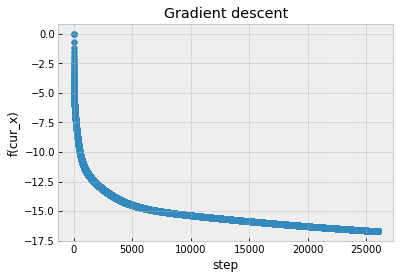

In [5]:
f_solution = f(x)
f_x_0 = f(steps[0][0])
x_axis = [i for i in range(steps.shape[0])]
y_axis = [math.log((f[1] - f_solution)/(f_x_0 - f_solution)) for f in steps]
plt.scatter(x_axis, y_axis)
plt.title('Gradient descent')
plt.xlabel('step')
plt.ylabel('f(cur_x)')